In [70]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pertpy as pt
import warnings
import pickle as pkl
from matplotlib import rcParams
from scarches.models.scpoli import scPoli
FIGSIZE=(3,3)
rcParams['figure.figsize']=FIGSIZE

In [77]:
with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/scib/rxrx1.pkl", "rb") as bm_file:
    bm = pkl.load(bm_file)

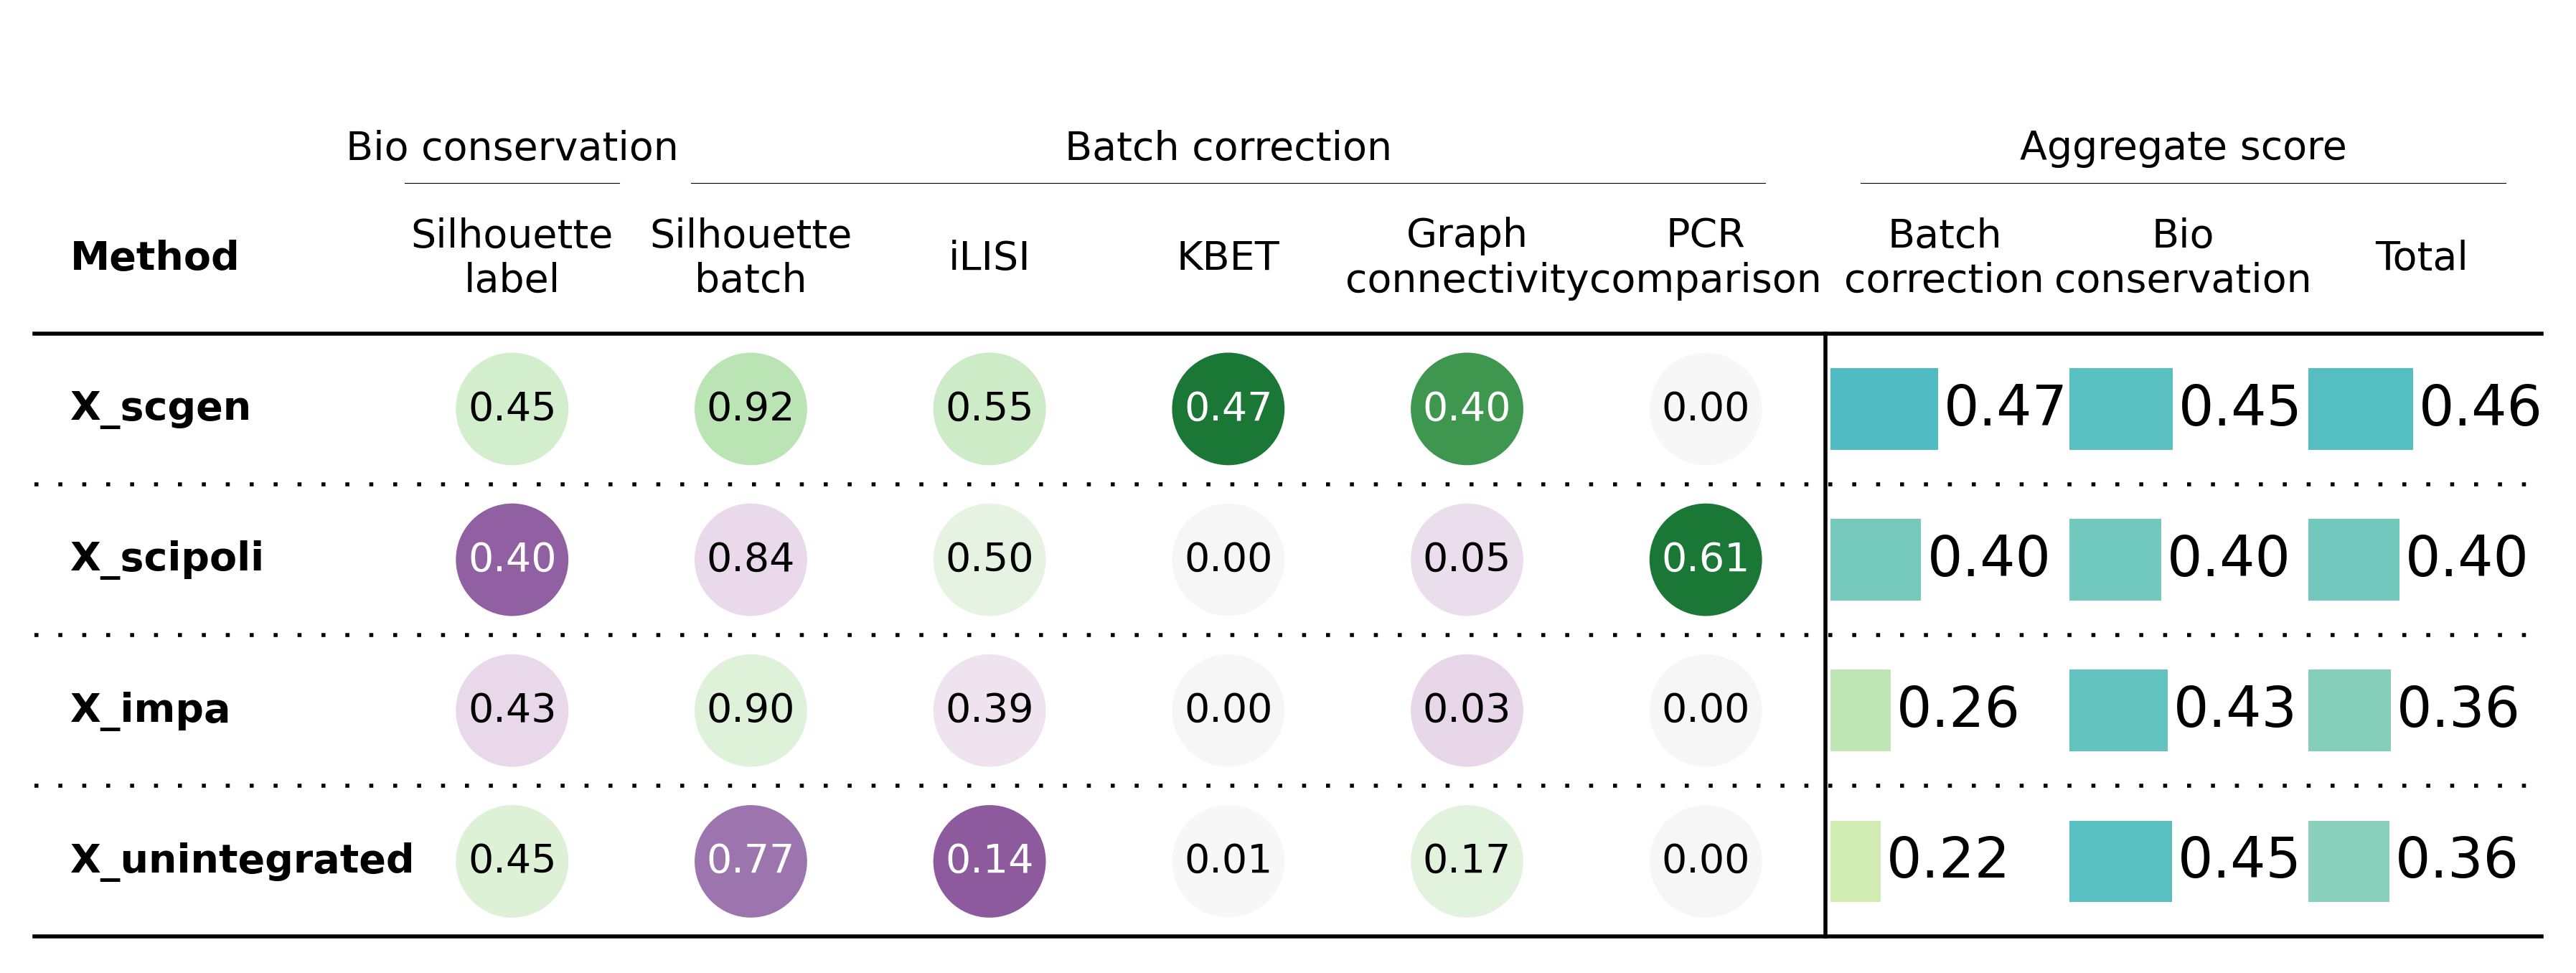

In [78]:
bm.plot_results_table(min_max_scale=False)

In [79]:
df = bm.get_results(min_max_scale=False)
df

,Silhouette label,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,
X_scgen,0.452321,0.920636,0.553551,0.474699,0.403489,0.000006,0.470476,0.452321,0.459583
X_scipoli,0.404629,0.840618,0.495213,0.0,0.045568,0.60648,0.397576,0.404629,0.401808
X_unintegrated,0.449814,0.771728,0.143812,0.009184,0.168656,0,0.218676,0.449814,0.357359
X_impa,0.430437,0.895801,0.38931,0.0,0.029328,0,0.262888,0.430437,0.363417
Metric Type,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


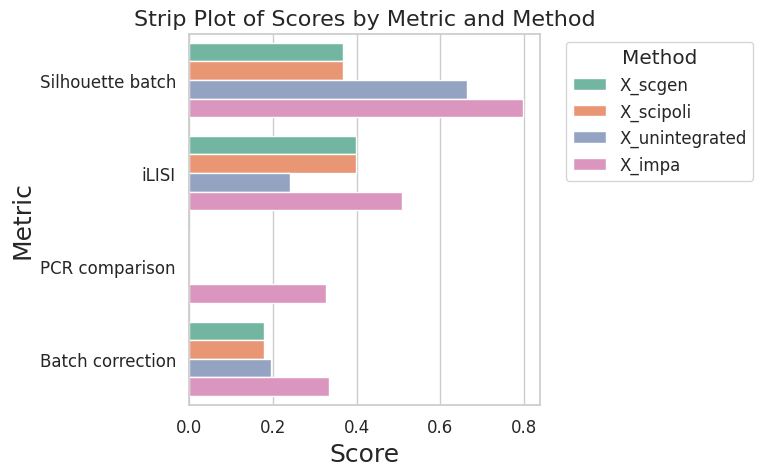

In [21]:
# Your DataFrame
data = {
    'Silhouette batch': [0.367302, 0.367302, 0.6646, 0.79835],
    'iLISI': [0.39958, 0.39958, 0.240081, 0.507487],
    'KBET': [0.033045, 0.033045, 0.0, 0.0],
    'Graph connectivity': [0.096746, 0.096746, 0.068822, 0.032839],
    'PCR comparison': [0.000007, 0.000007, 0, 0.326898],
    'Batch correction': [0.179336, 0.179336, 0.1947, 0.333115],
}

index = ['X_scgen', 'X_scipoli', 'X_unintegrated', 'X_impa']
columns = ['Silhouette batch', 'iLISI', 'PCR comparison', 'Batch correction']

df = pd.DataFrame(data, index=index, columns=columns)

# Transpose the DataFrame
df_transposed = df

# Reshape the DataFrame for stripplot
df_melted = df_transposed.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Set aesthetic parameters
sns.set(style='whitegrid', font_scale=1.2)

# Plotting with Seaborn - Horizontal Point plot (Swarm plot)
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")  # Choose a suitable color palette
# sns.stripplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette, dodge=True, jitter=True, size=14)  # Increase size here
sns.barplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette)  # Increase size here
plt.title('Strip Plot of Scores by Metric and Method', fontsize=16)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Metric', fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot
plt.legend(title='Method', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

READ SCGEN

In [36]:
def pca_umap_plot_with_preprocessing(adata, title, batch_name):
    sc.settings.figdir = "/home/icb/alessandro.palma/environment/IMPA/IMPA/notebooks/cpg0000/corrections_old_paper/plots/"

    # Set a random seed for reproducibility
    np.random.seed(0)

    # Randomly permute the indices
    random_indices = np.random.permutation(list(range(adata.shape[0])))

    # Set a color palette for better color representation
    sns.set_palette("colorblind")

    # Plot the PCA with random reordering
    sc.pl.pca(adata[random_indices, :], color=batch_name, title=title, s=30)

    # Plot the UMAP with random reordering
    sc.pl.umap(adata[random_indices, :], color=batch_name, title=title, s=30)

    # Show the plots
    plt.show()

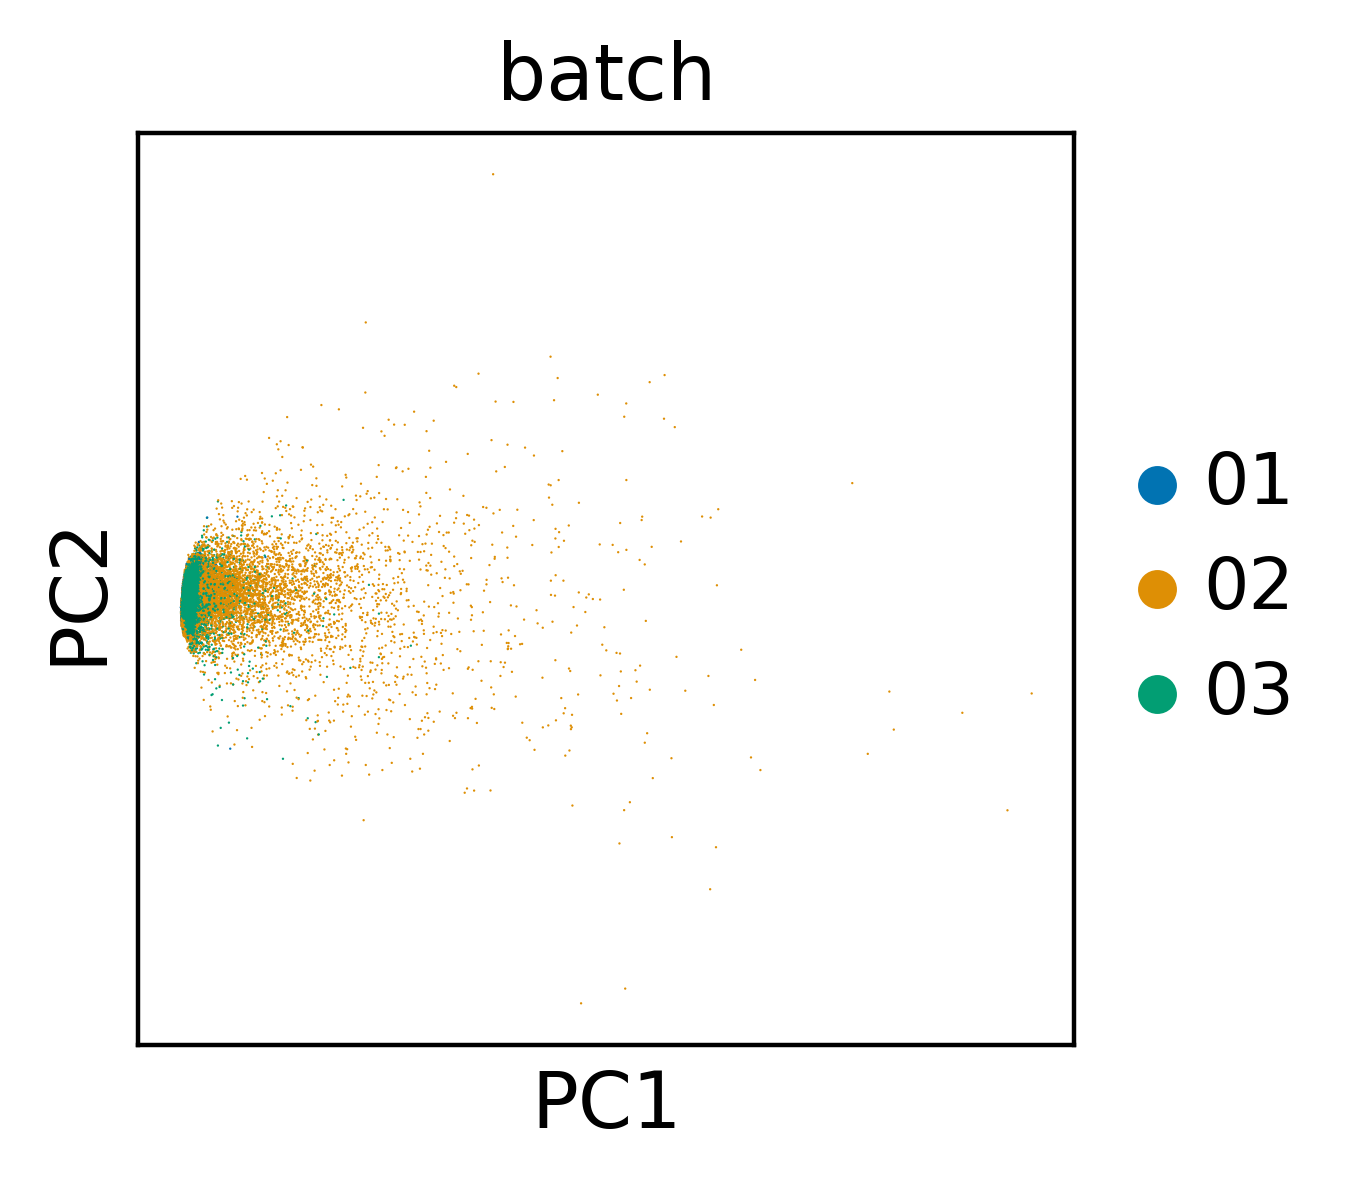

In [44]:
sc.pl.pca(scgen, color="batch")

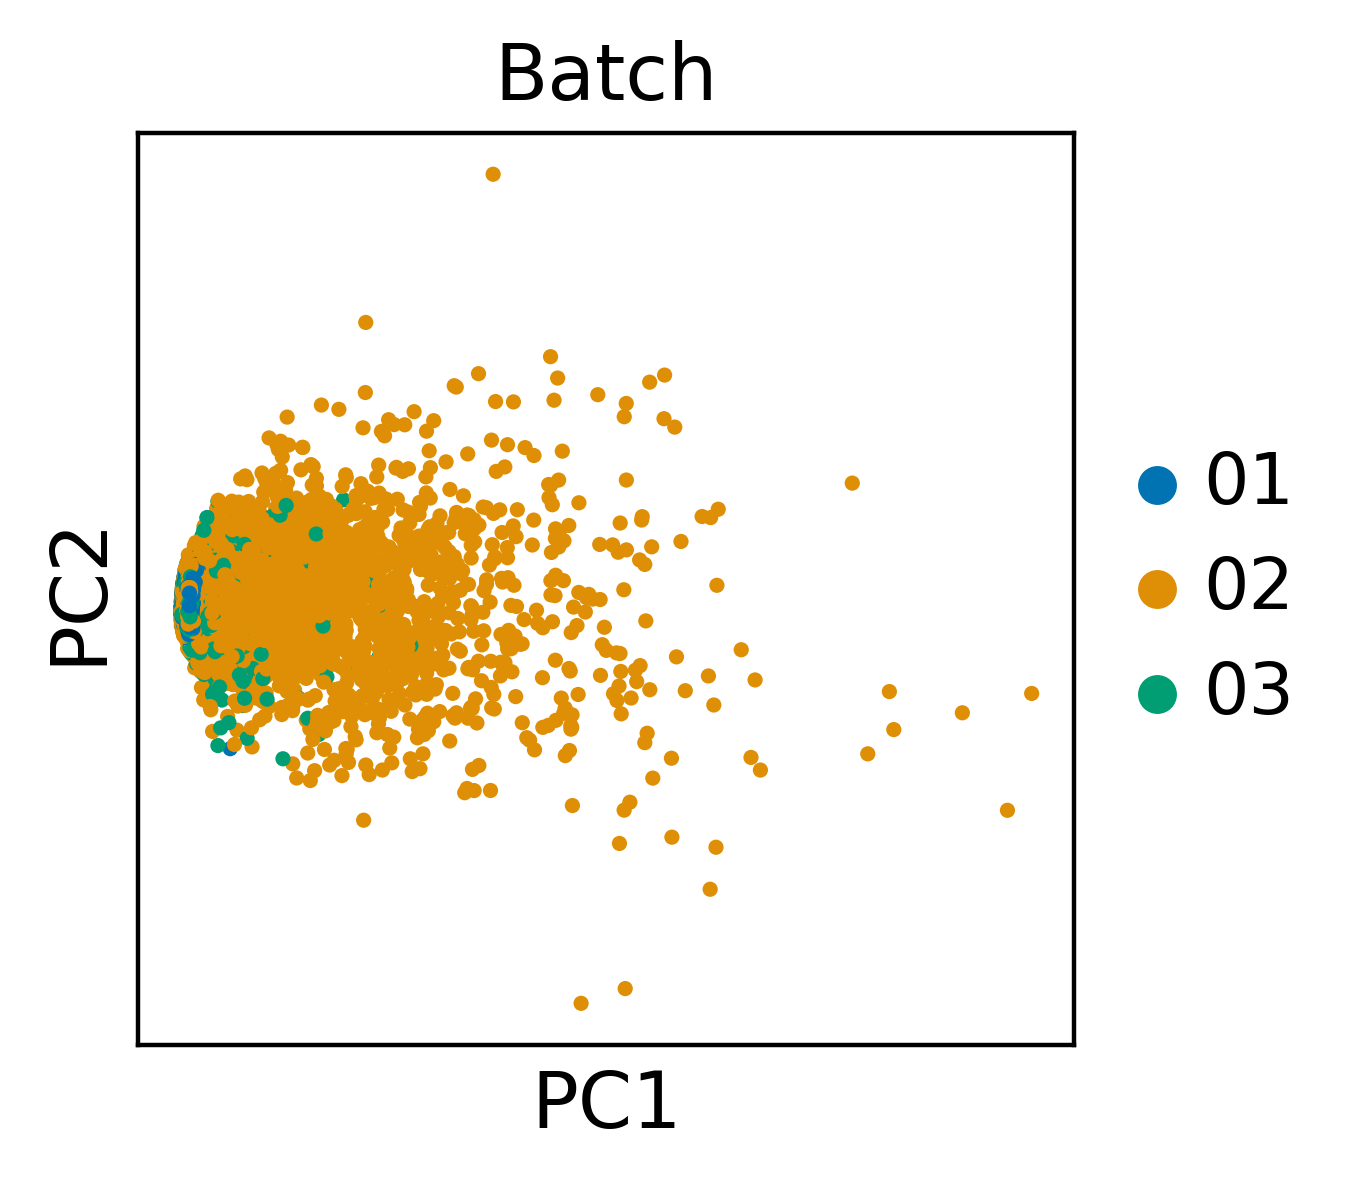

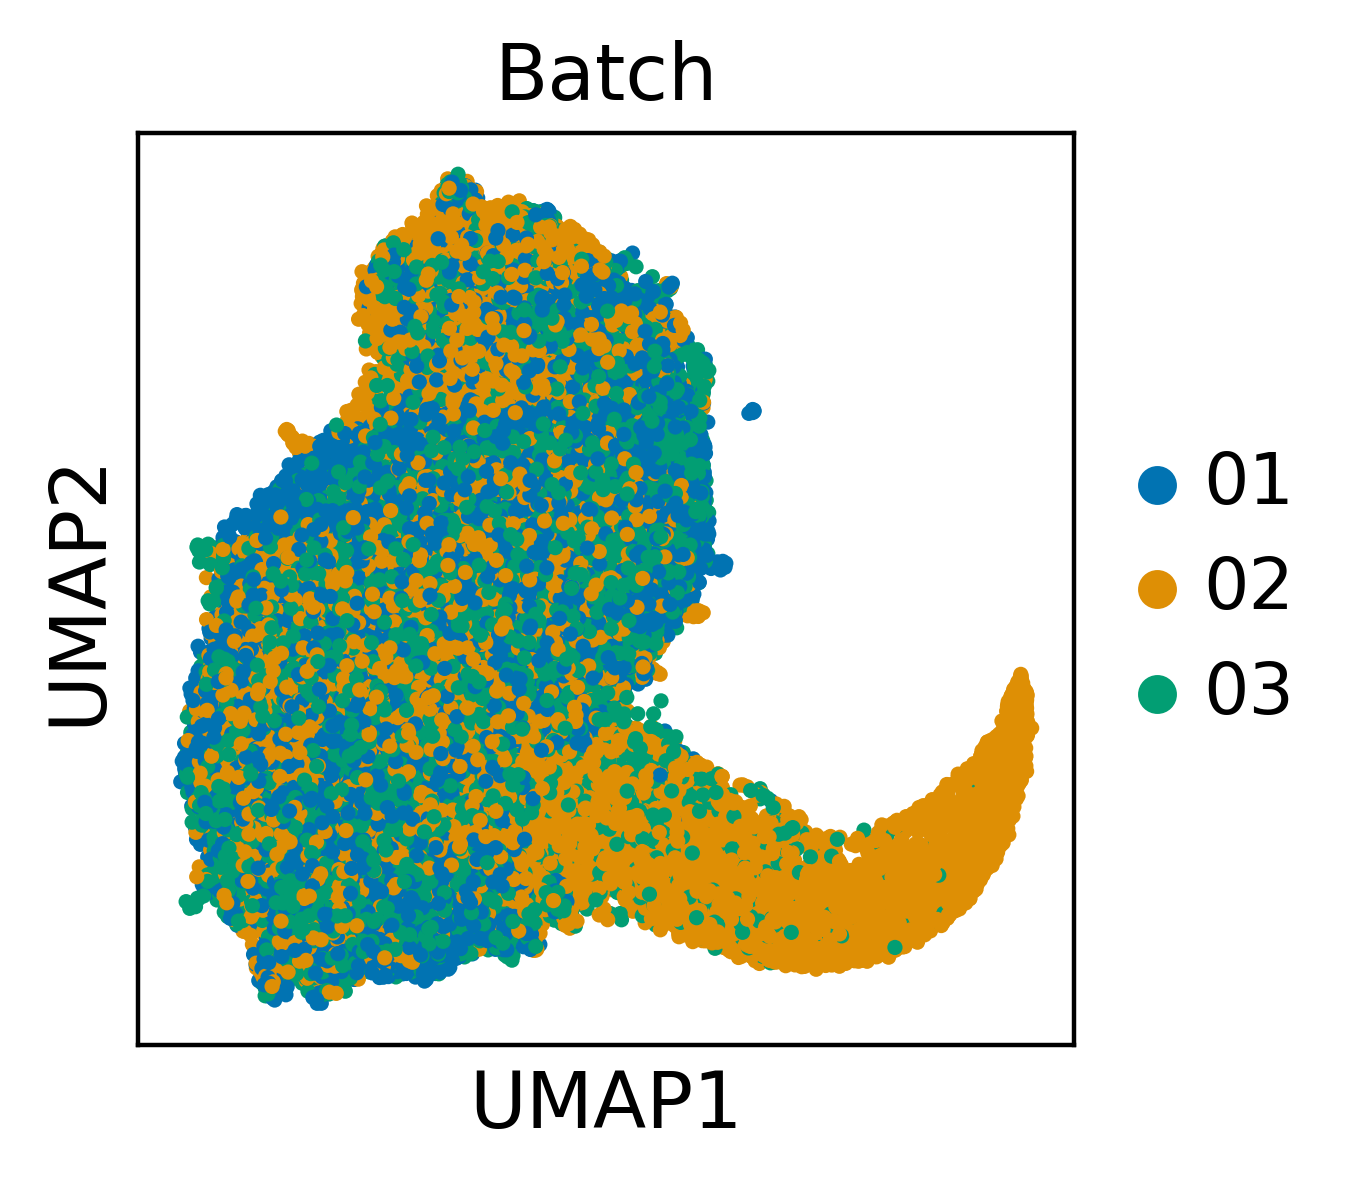

In [40]:
pca_umap_plot_with_preprocessing(scgen, "Batch", "batch")

In [65]:
scgen = sc.read_h5ad("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/featurized_anndata/rxrx1/rxrx1_adata_scpoli.h5ad")

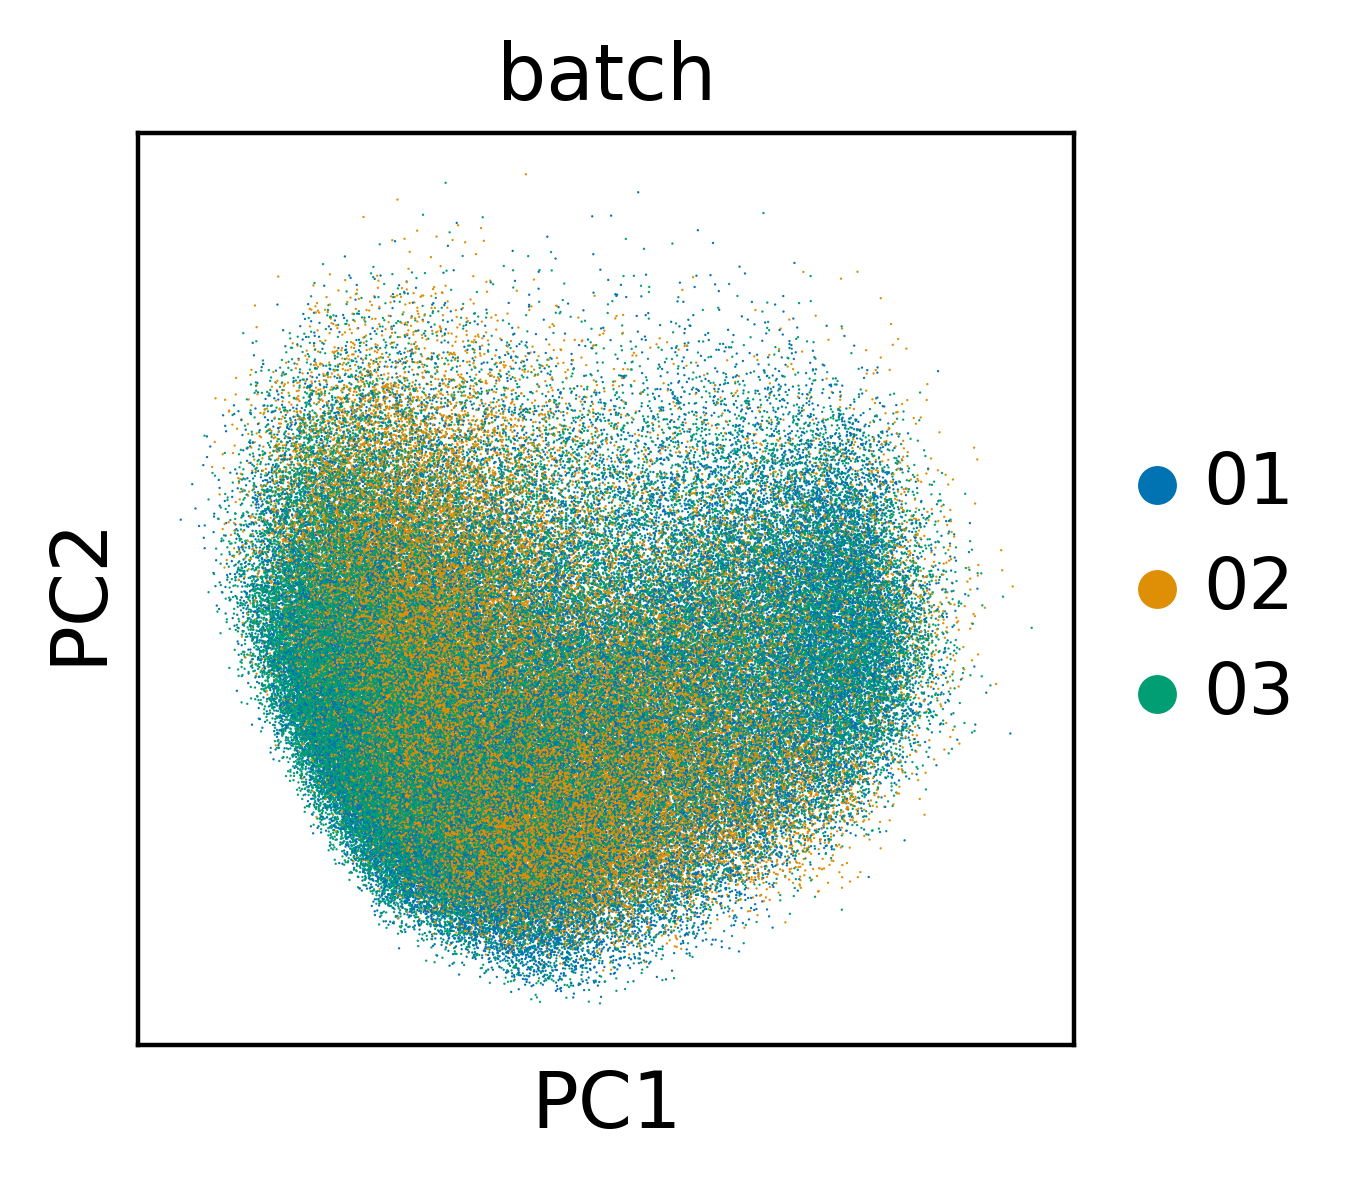

In [66]:
sc.pl.pca(scgen, color="batch", palette=sns.set_palette("colorblind"))

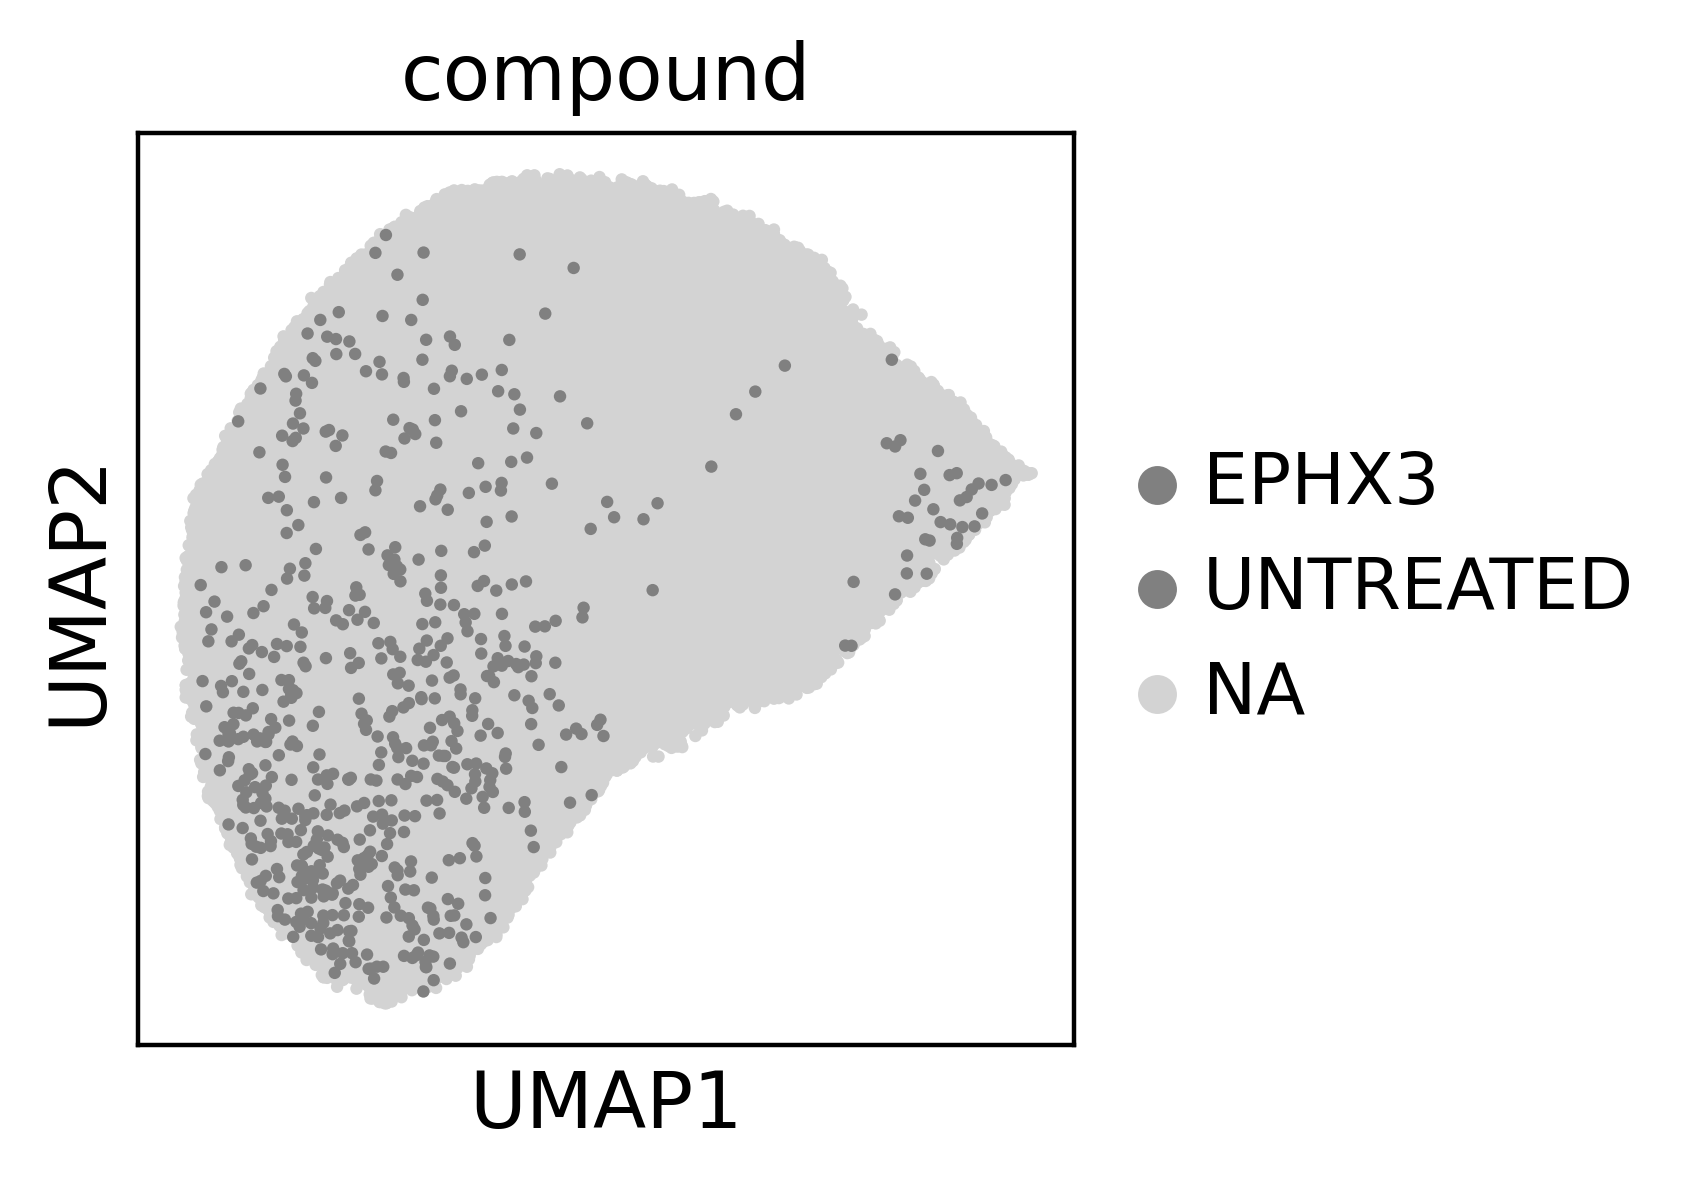

In [75]:
sc.pl.umap(scgen, color="compound", groups=["UNTREATED","EPHX3"], palette=sns.set_palette("colorblind"), s=20)